list index out of range


<ipython-input-1-9d89c5a7c4d7>:10: RuntimeWarning: overflow encountered in exp
  return  a1/(np.exp((x-M1)**2/(2*s1**2))*(s1*math.sqrt(2*math.pi))) + a2/(np.exp((x-M2)**2/(2*s2**2))*(s2*math.sqrt(2*math.pi)))+\
<ipython-input-1-9d89c5a7c4d7>:11: RuntimeWarning: overflow encountered in exp
  a3/(np.exp((x-M3)**2/(2*s3**2))*(s3*math.sqrt(2*math.pi)))


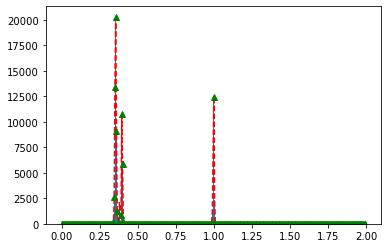

In [1]:
import matplotlib.pyplot as plt

import math
import numpy as np

from scipy.optimize import curve_fit

def func(x,  a1, s1, M1, a2, s2, M2, a3, s3, M3):

    return  a1/(np.exp((x-M1)**2/(2*s1**2))*(s1*math.sqrt(2*math.pi))) + a2/(np.exp((x-M2)**2/(2*s2**2))*(s2*math.sqrt(2*math.pi)))+\
                a3/(np.exp((x-M3)**2/(2*s3**2))*(s3*math.sqrt(2*math.pi)))

# read data from a text file. One number per line
arch = "/home/tenderbook/rs_test/1_150.in"
datos = []
bins = []
for item in open(arch,'r'):
    try:
        item = item.strip('\n')
        item_ = item.split(',')
        y = item_[1]
        bin = item_[0]
    except Exception as ex:
        print(ex)
    else:
        if y != '':
            try:
                datos.append(float(y))
                bins.append(float(bin))
            except ValueError:
                pass
p0 = [1.0, 0.00001, 1.0, 2.0, 0.01, 0.4, 3.0, 0.01, 0.35]
bound=(0, [10.0, 0.1, 2.0, 10., 0.1, 2.0, 10., 0.1, 2.0])
# plt.subplot(111)
plt.plot(bins, datos, 'r--', label='data')
# plt.subplot(112)
plt.bar(bins, datos, width=bins[1])

popt, pcov = curve_fit(f = func, xdata = bins, ydata = datos, p0=p0, absolute_sigma = True, check_finite=True, method='dogbox')
perr = np.sqrt(np.diag(pcov))

y = func(bins, *popt)

ydata = y 

# plt.plot(bins, func(bins, *popt), 'r-', label='fit: s1=%5.3f, M1=%5.3f, s2=%5.3f, M2=%5.3f, s3=%5.3f, M3=%5.3f' % tuple(popt))
# plt.subplot(114)
plt.plot(bins, func(bins, *popt), 'g^')

plt.show()


list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
fit: a1=1.000000, s1=0.000003, M1=1.000000 perr =  [9.10203110e-17 2.74454291e-11 2.04786003e-14]


<ipython-input-11-c013312d3d5b>:9: RuntimeWarning: overflow encountered in exp
  return  a/(np.exp((x-M)**2/(2*s**2))*(s*math.sqrt(2*math.pi)))
<ipython-input-11-c013312d3d5b>:9: RuntimeWarning: divide by zero encountered in true_divide
  return  a/(np.exp((x-M)**2/(2*s**2))*(s*math.sqrt(2*math.pi)))
<ipython-input-11-c013312d3d5b>:9: RuntimeWarning: invalid value encountered in multiply
  return  a/(np.exp((x-M)**2/(2*s**2))*(s*math.sqrt(2*math.pi)))


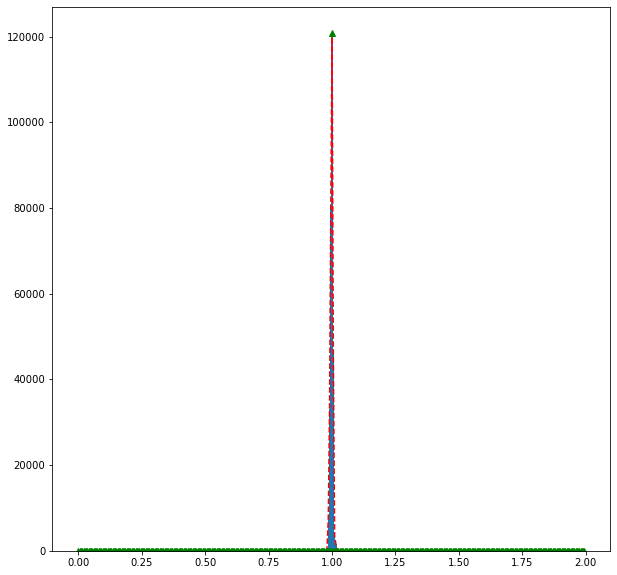

In [11]:
import matplotlib.pyplot as plt

import math
import numpy as np

from scipy.optimize import curve_fit

def func(x,  a, s, M):
    return  a/(np.exp((x-M)**2/(2*s**2))*(s*math.sqrt(2*math.pi)))

# read data from a text file. One number per line
arch = "/home/tenderbook/rs_test/0.5_150.in"
datos = []
bins = []
for item in open(arch,'r'):
    try:
        item = item.strip('\n')
        item_ = item.split(',')
        y = item_[1]
        bin = item_[0]
    except Exception as ex:
        print(ex)
    else:
        if y != '':
            try:
                datos.append(float(y))
                bins.append(float(bin))
            except ValueError:
                pass
p0 = [1.0, 0.001, 0.5]
bound=(0, [np.inf, 1.0, 2.0])
# plt.subplot(111)

plt.plot(bins, datos, 'r--', label='data')
# plt.subplot(112)
plt.bar(bins, datos, width=bins[1])

popt, pcov = curve_fit(f = func, xdata = bins, ydata = datos, p0=p0, absolute_sigma = True, check_finite=True, bounds=bound,  method='dogbox')
perr = np.sqrt(np.diag(pcov))

y = func(bins, *popt)


ydata = y 


plt.rcParams['figure.figsize'] = (plt.rcParamsDefault['figure.figsize'][0]*2, plt.rcParamsDefault['figure.figsize'][0]*2)
# plt.plot(bins, func(bins, *popt), 'r-', label='fit: s1=%5.3f, M1=%5.3f, s2=%5.3f, M2=%5.3f, s3=%5.3f, M3=%5.3f' % tuple(popt))
# plt.subplot(114)
plt.plot(bins, func(bins, *popt), 'g^', label='fit: a1={:f}, M1={:f}, s1={:f}'.format(*popt))
print('fit: a1={:f}, s1={:f}, M1={:f}'.format(*popt), 'perr = ', perr )


plt.show()
